Primero, cargamos el dataset y reducimos su dimensionalidad.

In [45]:
import pandas as pd

# Cargargamos el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Separar nuesta categoria principal, la cual va a ser la calidad de las demas caracteristicas
X = data.drop('quality', axis=1)
y = data['quality']

Calcularemos la importancia de características usando un modelo de Random Forest.
Seleccionaremos las características más importantes

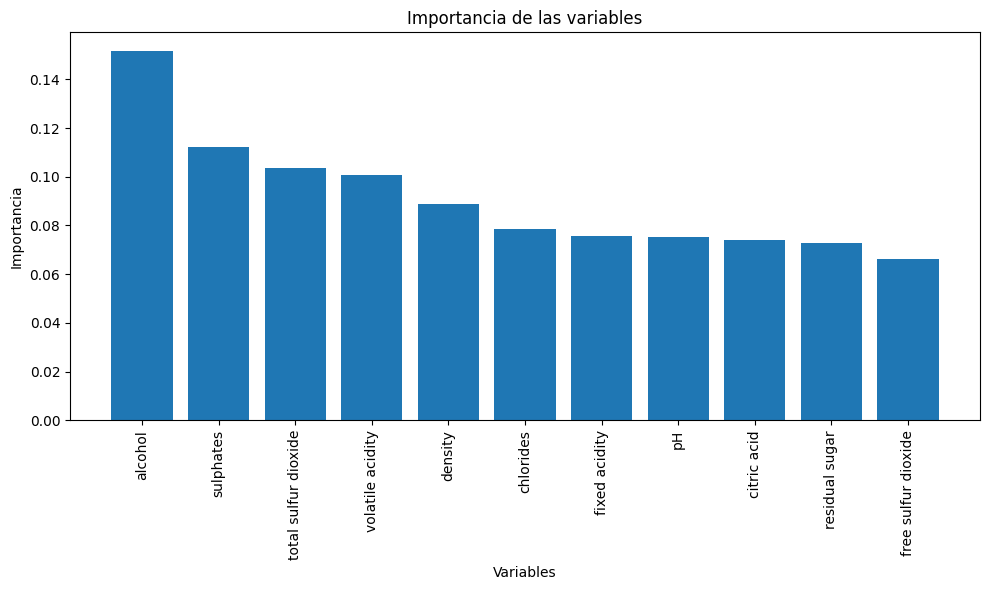

In [46]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Modelo para calcular importancias
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obtenemos importancias de características
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Seleccionamos las características más relevantes (Aquellas que esten por encima de 0.05)
selected_features = importances[importances['Importance'] > 0.05]['Feature']
X_reduced = X[selected_features]

# Gráfico de barras de la importancia de las variables
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables')
plt.tight_layout()
plt.show()

Elegimos un algoritmo de clasificacion: agruparemos las calidades del vino en categorías de baja, media y alta calidad, y entrenaremos un modelo de clasificación.

Ademas, vamos a usar SMOTE (Synthetic Minority Over-sampling Technique) es una técnica utilizada para abordar el problema del desequilibrio de clases en conjuntos de datos. Esto ayuda a mejorar el rendimiento del modelo

In [47]:
from imblearn.over_sampling import SMOTE

# Agrupamos calidad en 3 categorías; baja, media y alta
y_class = pd.cut(
    y,
    bins=[2, 5, 6, 8],
    labels=["Baja", "Media", "Alta"]
)

# Aplicamos SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_reduced, y_class)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

Ahora veremos la fidelidad del modelo y que metricas nos arroja el mismo

In [48]:
from sklearn.metrics import classification_report, accuracy_score

# Predicción
y_pred = clf.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8366890380313199
Reporte de clasificación:
               precision    recall  f1-score   support

        Alta       0.97      0.72      0.82       131
        Baja       0.88      0.91      0.90       159
       Media       0.73      0.86      0.79       157

    accuracy                           0.84       447
   macro avg       0.86      0.83      0.84       447
weighted avg       0.85      0.84      0.84       447



Vemos que el modelo tiene un 83% de exito a la hora de predecir la calidad del vino basandose en su composicion quimica. vemos que donde mas facilidad de distinguir tiene es en rango "alto" y tambien se desempeña bien en rango "bajo" pues alli los patrones quimicos son mas distintivos. El rango "medio" es el de menos presicion y es normal, pues alli es donde se encuentra la mayor diversidad en las variables, lo que lo hace mas impredecible

El grafico nos muestra cuales son las variables mas importantes para la calidad del vino. Como vimos en la primera parte, nos confirma que el alcohol y los sulfatos son las que mas influyentes. Algunas variables, como el pH o el cloruro, mostraron menor impacto en el modelo, lo que sugiere que su variabilidad no afecta significativamente la calidad del vino.

El modelo puede tener muchos usos practicos, como para los enologos, quienes pueden usar el modelo para ajustar el proceso de produccion o para una segmentacion de mercado, donde las bodegas pueden producir vinos dirigidos a diferentes grupos de consumidores
